
COURSE 5 - DS - CAPSTONE PROJECT

PROJECT 2: HEALTHCARE
    
    
***
***

#### - The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included 
#### in the dataset.

#### - Build a model to accurately predict whether the patients in the dataset have diabetes or not.

#### - Dataset is builded with 8 medical predictor variables and 1 target ("outcome")

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
# Import dataset
data = pd.read_csv("diabetes.csv")

In [3]:
# First rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Last rows of the dataframe
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Dimension of the dataset
data.shape

(768, 9)

In [6]:
# Summary information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Null values
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
# Duplicated values
data.duplicated().any()

False

In [9]:
# Negative values
(data.values < 0).any()

False

**Insights for general information:**

Dataset contains 9 columns and 768 rows, which 1 represent the target variable (called "Outcome")
Data type is represented by numerical values, such as: int64 and float64:
        
     - 7 columns are integer, one of them is the target
     - 2 columns are float
     - There is no categorical variables
     - There is no null value
     - There is no duplicated value
     - There is no negative values either

***
## PROJECT TASK: WEEK 1

### DATA EXPLORATION

#### 1. Perform descriptive analysis.
#### (Some variables (Glucose, BloodPressure, SkinThikness, Insulin, BMI) have values as zero, thus indicates missing value)

In [10]:
data.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


**Insights from descriptive analysis:**

Pregnancies shows 75% of the data points represent 6 or less times pregnancies per person, where at least 25% of them have been pregnant once. The dispersion is kindly low, which indicates data points are close the mean.

Glucose, BloodPressure, SkinThikness, Insulin, BMI need to be analyze closely since their zero values represent missing points, these statistic summary is being alterated because of this issue into the dataset.

DaibetesPedigreeFunction have 75% of points below 0.626 value. The dispersion is lower than the average, so most of the data points are kindly close the mean.

Age shows 75% of women have been pregnant before 41 years old, where 25% are concentrated in 24 years old and 50% in 29. The dispersion of points occurs below the mean value, but showing there is certain variablility with this values comparing with the rest of the variables behavior.

In the case of the Outcome (target), 50% or lower has value like 0, and it is in 75% of the data points analyzed where it is visible values like 1 or lower (like 0, in this case). Here the dispersion is greater than mean, indicating there is high variation between values, which is logic because it is a binary variable (just 0 and 1).

#### 2. Visually explore these variables using histograms. Treat the missing values accordingly

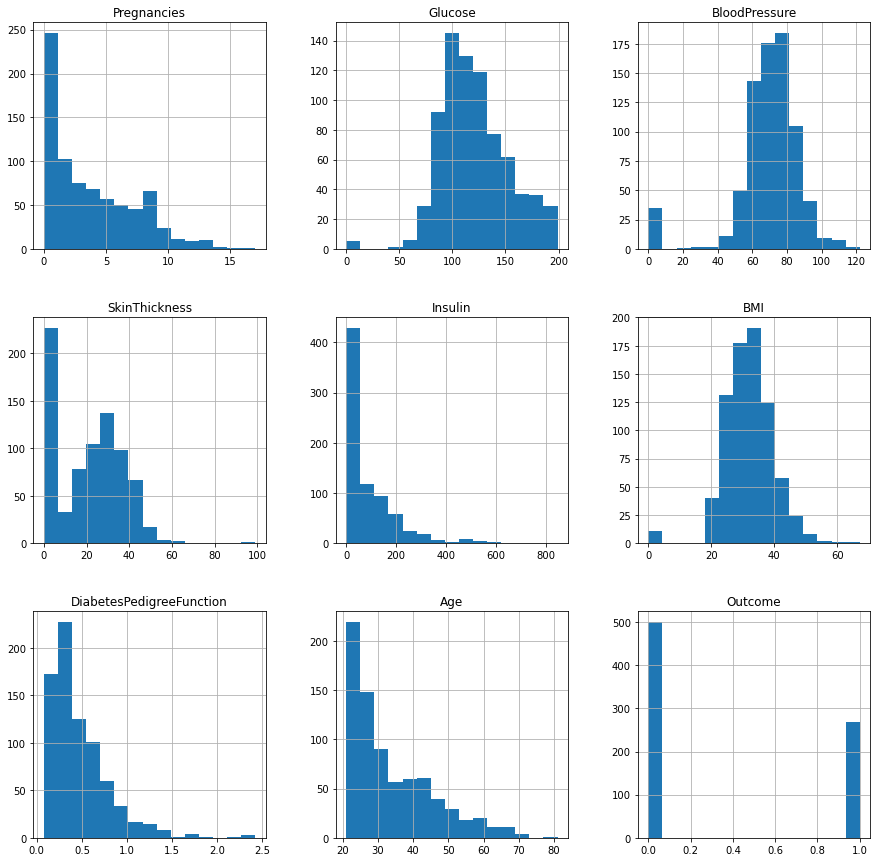

In [11]:
# Data distribution
data.hist(figsize=(15,15), bins = 15)
plt.show()

In [12]:
data['SkinThickness'].value_counts(normalize= True).head().round(2)  # 30% of values are zero's

0     0.30
32    0.04
30    0.04
27    0.03
23    0.03
Name: SkinThickness, dtype: float64

In [13]:
data['Insulin'].value_counts(normalize= True).head().round(2)  # almost 50% of values are zero's

0      0.49
105    0.01
140    0.01
130    0.01
120    0.01
Name: Insulin, dtype: float64

In [14]:
data['Outcome'].value_counts(normalize= True).round(2)  # 65% of points represent zero value and 35% represent 1's

0    0.65
1    0.35
Name: Outcome, dtype: float64

**Insights from histograms representation:**

Pregnancies, DiabetesPedigreeFunction, Age are described as right-skewed histograms or positively skewed histogram. In this case:  Mean > Median > Mode.
    
Glucose is slightly skewed to the right, but also is slightly bimodal with a zero value bar second peak.

BloodPressure seems to be a bimodal distribution, where the second peak is the bar represented by zero values.

BMI is another bimodal histogram, but unlike BloodPressure, this zeros bar peak is very smooth.

SkinThickness has a bimodal histogram, but in this case the highest peak is represented by zero values.

Insulin is right-skewed histograms, it is important consider that zero values represent missing data.
    
Outcome (target) histogram only provide confirmation on the output is restricted to two values, in this case 0 and 1.
    

Fot those variables with zero values, it is recommended to replace them for logic values, since they are creating anomalies into the dataset.

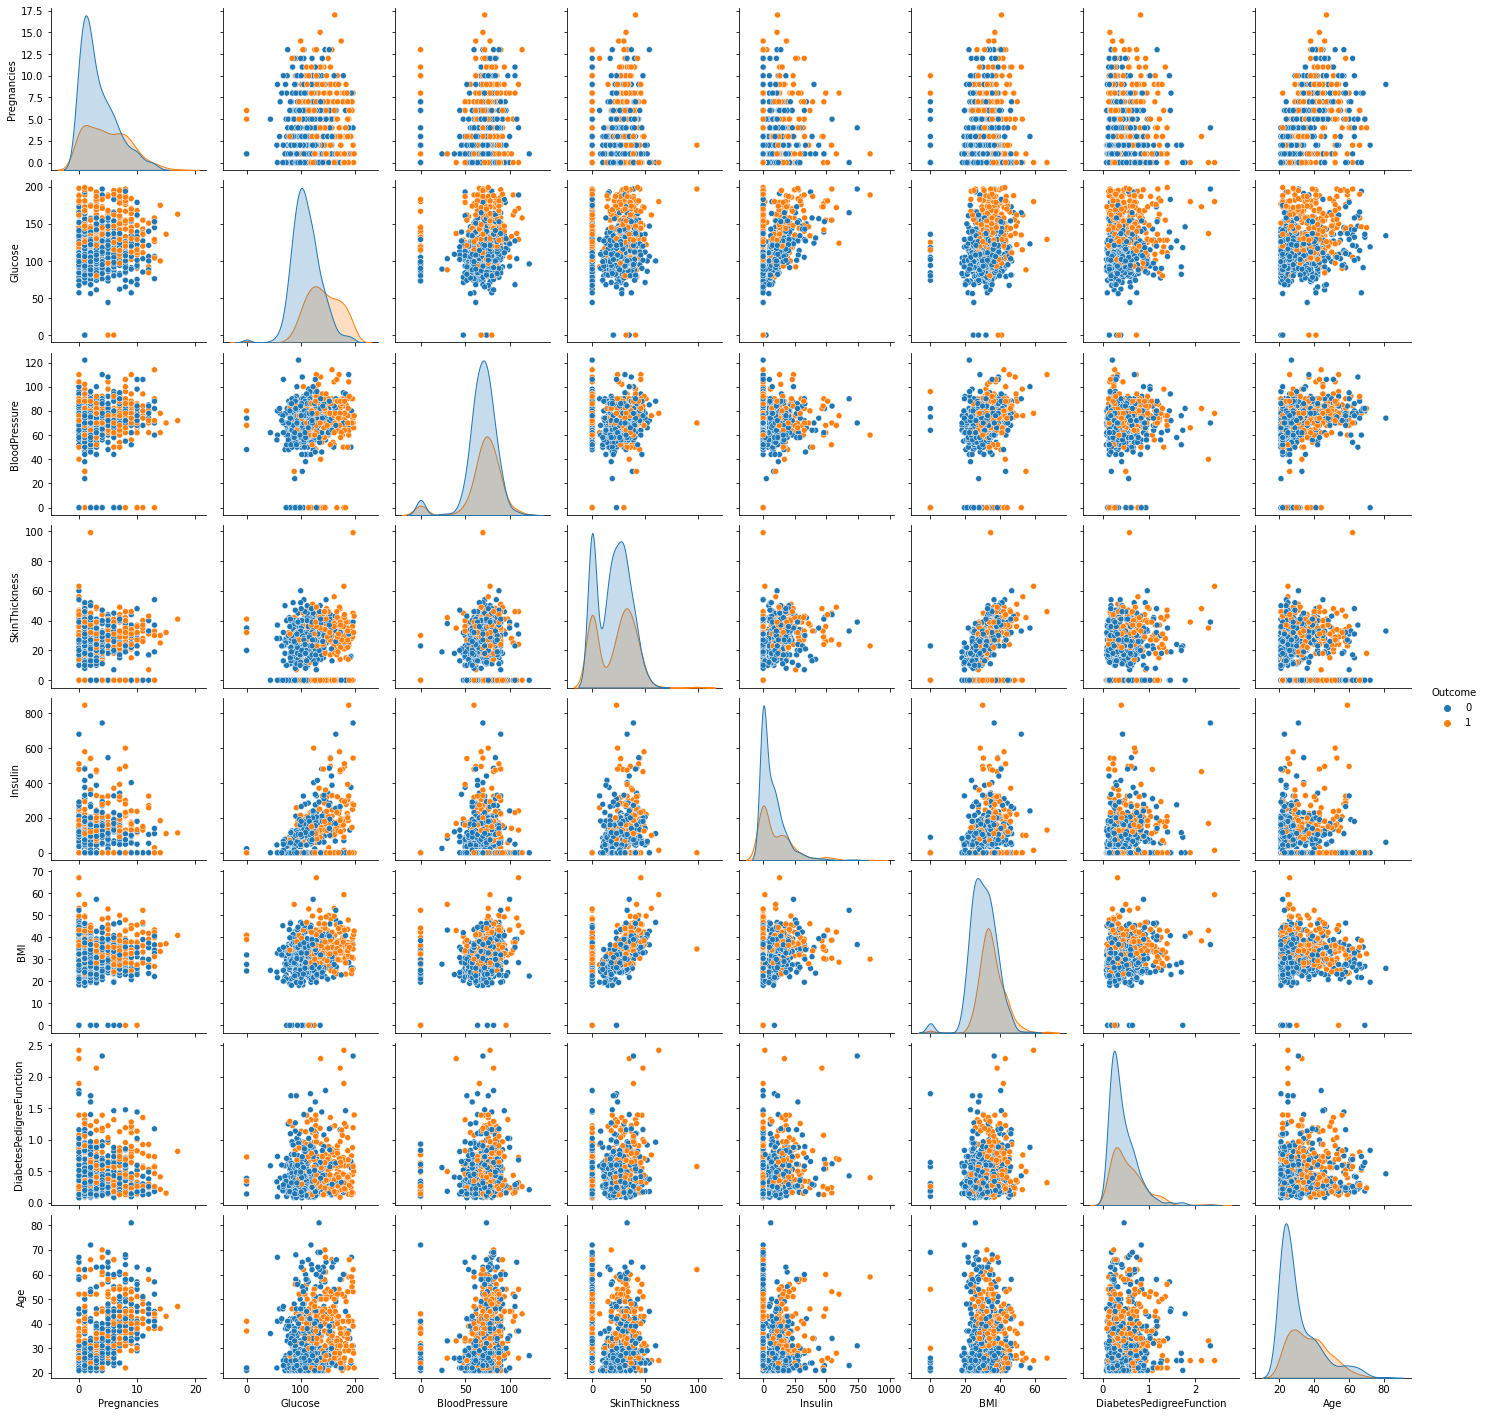

In [15]:
sns.pairplot(data, hue= 'Outcome')

**Insights from plots variables considering the Outcome into the plots:**

Seeing closely the impact of SkinThickness and Insulin variables over the Outcome, clearly the zero values does not follow thetendency of the rest of data points, could be interpreted as outliers. Even  BMI and BloodPressure zero values are keeping the same effect over the graphics.

The recommendation so far is to analyze the dataframe with zero values content and replace them by central tendency measure: mean, median or mode. 

#### 2.1 Treating missing values accordingly

Find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.

Plots such as box plots and distribution plots come very handily in deciding which techniques to use. Let's plot the 5 variables with a value of zero as missing value

It is known whenever the data is skewed, it is not recommended to use the mean for replacing the missing values, because may not create a great model and hence gets ruled out. 

In such cases, it is good to consider using median or mode value for replacing the missing values.

In [16]:
# Create a dataframe with just columns missing value:
data_miss_val = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
data_miss_val.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

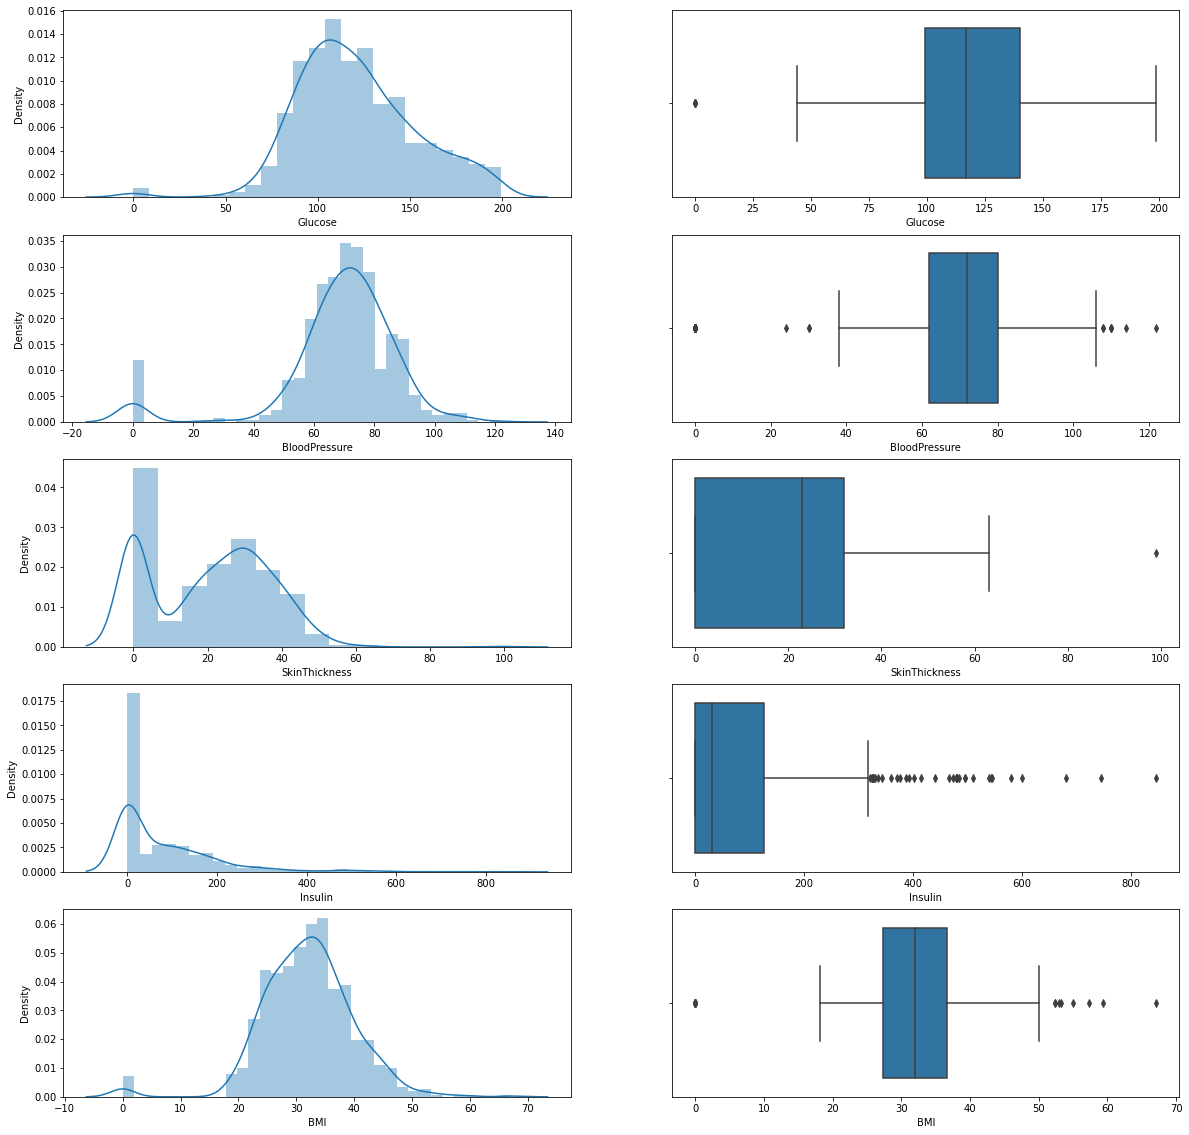

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

names = data_miss_val.columns
i = 1
plt.figure(figsize = (20,20))

for name in names:
    plt.subplot(5,2,i)
    sns.distplot(data_miss_val[name])
    
    plt.subplot(5,2,i+1)
    sns.boxplot(data_miss_val[name])
    i = i + 2
plt.show()

##### Glucose

In [18]:
# Treating missing values in "Glucose" variable
print("Glucose variable has {} zero values" .format(data.loc[data['Glucose'] == 0].shape[0]))

Glucose variable has 5 zero values


In [19]:
print("The mean value for Glucose is:", data.Glucose.mean(), "\n")
print("The median value for Glucose is:", data.Glucose.median(), "\n")
print("The mode value(s) for Glucose is:", data.Glucose.mode())

The mean value for Glucose is: 120.89453125 

The median value for Glucose is: 117.0 

The mode value(s) for Glucose is: 0     99
1    100
dtype: int64


After treating missing values, Glucose contains 0 values as missing data


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


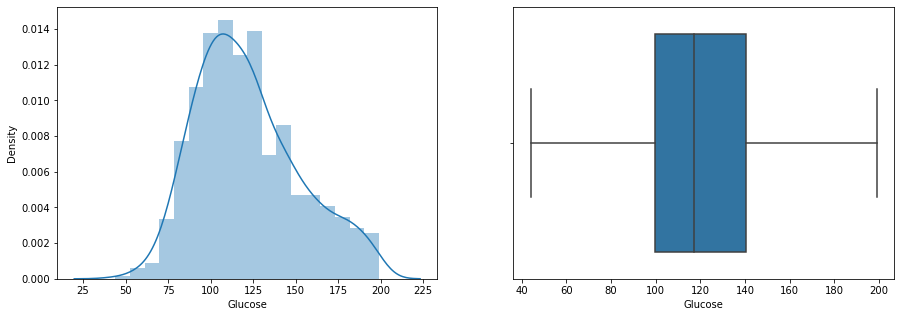

In [20]:
# Because Glucose is partially skewded to the right, it chooses to replace zero's for the median value (117.0)
data['Glucose'] = data['Glucose'].replace(to_replace= 0, value= 117.0)
print("After treating missing values, Glucose contains {} values as missing data" .format(data.loc[data['Glucose'] == 0].shape[0]))
print("\n")
plt.figure(figsize = (15,5))
print(plt.subplot(1,2,1))
print(sns.distplot(data['Glucose']))
print(plt.subplot(1,2,2))
print(sns.boxplot(data['Glucose']))

In [21]:
print("The new mean value for Glucose is:", data.Glucose.mean(), "\n")
print("The new median value for Glucose is:", data.Glucose.median(), "\n")
print("The new mode value(s) for Glucose is:", data.Glucose.mode())

The new mean value for Glucose is: 121.65625 

The new median value for Glucose is: 117.0 

The new mode value(s) for Glucose is: 0     99
1    100
dtype: int64


##### Blood Pressure

In [22]:
# Treating missing values in "BloodPressure" variable
data.loc[data['BloodPressure'] == 0]
print("BloodPressure variable has {} zero values" .format(data.loc[data['BloodPressure'] == 0].shape[0]))

BloodPressure variable has 35 zero values


In [23]:
print("The mean value for BloodPressure is:", data.BloodPressure.mean(), "\n")
print("The median value for BloodPressure is:", data.BloodPressure.median(), "\n")
print("The mode value(s) for BloodPressure is:", data.BloodPressure.mode())

The mean value for BloodPressure is: 69.10546875 

The median value for BloodPressure is: 72.0 

The mode value(s) for BloodPressure is: 0    70
dtype: int64


After treating missing values, BloodPressure contains 0 values as missing data


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


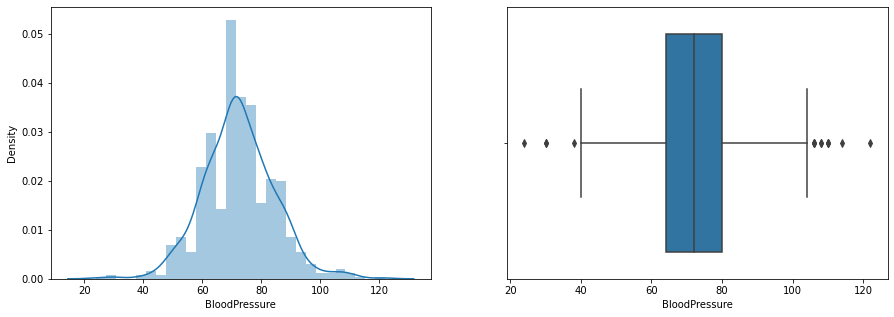

In [24]:
# BloodPressure variable has the central tendency values very close, for that reason I suggest to assign a contant value to
# replace the missing values which graphically represent a secong peak in this histogram:
data['BloodPressure'] = data['BloodPressure'].replace(to_replace= 0, value= 71)
print("After treating missing values, BloodPressure contains {} values as missing data" .format(data.loc[data['BloodPressure'] == 0].shape[0]))
print("\n")
plt.figure(figsize = (15,5))
print(plt.subplot(1,2,1))
print(sns.distplot(data['BloodPressure']))
print(plt.subplot(1,2,2))
print(sns.boxplot(data['BloodPressure']))

In [25]:
print("The new mean value for BloodPressure is:", data.BloodPressure.mean(), "\n")
print("The new median value for BloodPressure is:", data.BloodPressure.median(), "\n")
print("The new mode value(s) for BloodPressure is:", data.BloodPressure.mode())

The new mean value for BloodPressure is: 72.34114583333333 

The new median value for BloodPressure is: 72.0 

The new mode value(s) for BloodPressure is: 0    70
dtype: int64


##### SkinThickness

In [26]:
# Treating missing values in "SkinThickness" variable
data.loc[data['SkinThickness'] == 0]
print("SkinThickness variable has {} zero values" .format(data.loc[data['SkinThickness'] == 0].shape[0]))

SkinThickness variable has 227 zero values


In [27]:
print("The mean value for SkinThickness is:", data.SkinThickness.mean(), "\n")
print("The median value for SkinThickness is:", data.SkinThickness.median(), "\n")
print("The mode value(s) for SkinThickness is:", data.SkinThickness.mode())

The mean value for SkinThickness is: 20.536458333333332 

The median value for SkinThickness is: 23.0 

The mode value(s) for SkinThickness is: 0    0
dtype: int64


After treating missing values, SkinThickness contains 0 values as missing data


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


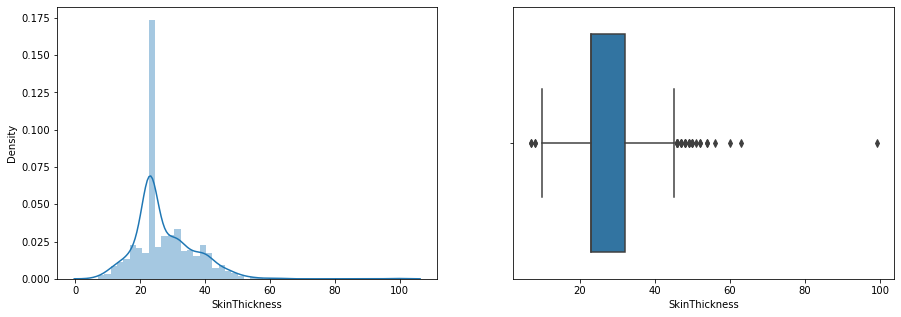

In [28]:
# As it was expected, the mode value is represented by the issue: zero values. The replacement is going to be by median value
data['SkinThickness'] = data['SkinThickness'].replace(to_replace= 0, value= 23.0)
print("After treating missing values, SkinThickness contains {} values as missing data" .format(data.loc[data['SkinThickness'] == 0].shape[0]))
print("\n")
plt.figure(figsize = (15,5))
print(plt.subplot(1,2,1))
print(sns.distplot(data['SkinThickness']))
print(plt.subplot(1,2,2))
print(sns.boxplot(data['SkinThickness']))

In [29]:
print("The new mean value for SkinThickness is:", data.SkinThickness.mean(), "\n")
print("The new median value for SkinThickness is:", data.SkinThickness.median(), "\n")
print("The new mode value(s) for SkinThickness is:", data.SkinThickness.mode())

The new mean value for SkinThickness is: 27.334635416666668 

The new median value for SkinThickness is: 23.0 

The new mode value(s) for SkinThickness is: 0    23
dtype: int64


##### Insulin

In [30]:
# Treating missing values in "Insulin" variable
data.loc[data['Insulin'] == 0]
print("Insulin variable has {} zero values" .format(data.loc[data['Insulin'] == 0].shape[0]))

Insulin variable has 374 zero values


In [31]:
print("The mean value for Insulin is:", data.Insulin.mean(), "\n")
print("The median value for Insulin is:", data.Insulin.median(), "\n")
print("The mode value(s) for Insulin is:", data.Insulin.mode())

The mean value for Insulin is: 79.79947916666667 

The median value for Insulin is: 30.5 

The mode value(s) for Insulin is: 0    0
dtype: int64


After treating missing values, Insulin contains 0 values as missing data


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


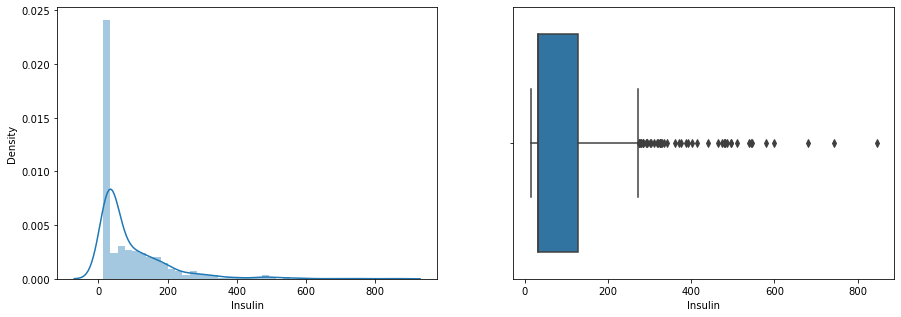

In [32]:
# Same as SkinThickness situation, zero is the most frequent value. The replacement is applied with median value
data['Insulin'] = data['Insulin'].replace(to_replace= 0, value= 30.5)
print("After treating missing values, Insulin contains {} values as missing data" .format(data.loc[data['Insulin'] == 0].shape[0]))
print("\n")
plt.figure(figsize = (15,5))
print(plt.subplot(1,2,1))
print(sns.distplot(data['Insulin']))
print(plt.subplot(1,2,2))
print(sns.boxplot(data['Insulin']))

In [33]:
print("The new mean value for Insulin is:", data.Insulin.mean(), "\n")
print("The new median value for Insulin is:", data.Insulin.median(), "\n")
print("The new mode value(s) for Insulin is:", data.Insulin.mode())

The new mean value for Insulin is: 94.65234375 

The new median value for Insulin is: 31.25 

The new mode value(s) for Insulin is: 0    30.5
dtype: float64


##### BMI

In [34]:
# Treating missing values in "BMI" variable
data.loc[data['BMI'] == 0]
print("BMI variable has {} zero values" .format(data.loc[data['BMI'] == 0].shape[0]))

BMI variable has 11 zero values


In [35]:
print("The mean value for BMI is:", data.BMI.mean(), "\n")
print("The median value for BMI is:", data.BMI.median(), "\n")
print("The mode value(s) for BMI is:", data.BMI.mode())

The mean value for BMI is: 31.992578124999977 

The median value for BMI is: 32.0 

The mode value(s) for BMI is: 0    32.0
dtype: float64


After treating missing values, BMI contains 0 values as missing data


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


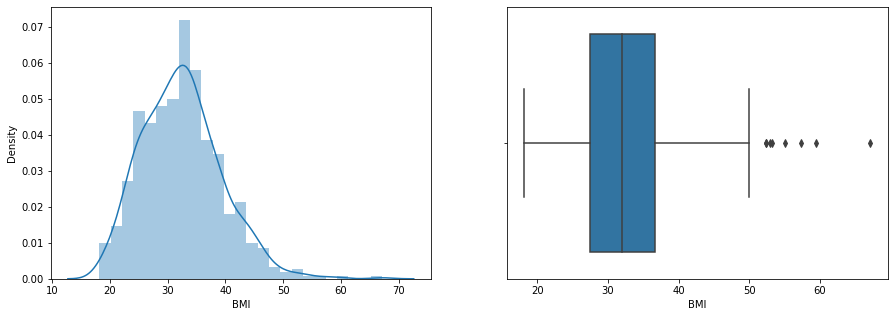

In [36]:
# All central tendency values have the same value, in this case the zero bar does not have any influence over this distribution
# of data
data['BMI'] = data['BMI'].replace(to_replace= 0, value= 32.0)
print("After treating missing values, BMI contains {} values as missing data" .format(data.loc[data['BMI'] == 0].shape[0]))
print("\n")
plt.figure(figsize = (15,5))
print(plt.subplot(1,2,1))
print(sns.distplot(data['BMI']))
print(plt.subplot(1,2,2))
print(sns.boxplot(data['BMI']))

In [37]:
print("The new mean value for BMI is:", data.BMI.mean(), "\n")
print("The new median value for BMI is:", data.BMI.median(), "\n")
print("The new mode value(s) for BMI is:", data.BMI.mode())

The new mean value for BMI is: 32.45091145833331 

The new median value for BMI is: 32.0 

The new mode value(s) for BMI is: 0    32.0
dtype: float64


**Insights after treating missing values**

Glucose --> is not a bimodal distribution anymore but still a right- skewed histogram

BloodPressure and BMI --> are not anymore bimodal histogram either, but a normal distribution instead

SkinThickness and Insulin --> are right-skewed histogram, with a high peak in the median value because the replacement of their 30% and 50% values, respectively

In [ ]:
# Let's export the clean dataframe for future tasks in Tableau

In [38]:
data.to_excel(r'C:\Users\IRA\Documents\Courses\Online Courses\SimpliLearn\Course5-Data_Science_Capstone\Project2-Healthcare\export_diabetic_dataframe.xlsx', index = False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\IRA\\Documents\\Courses\\Online Courses\\SimpliLearn\\Course5-Data_Science_Capstone\\Project2-Healthcare\\export_diabetic_dataframe.xlsx'

#### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

##### Pregnancies

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

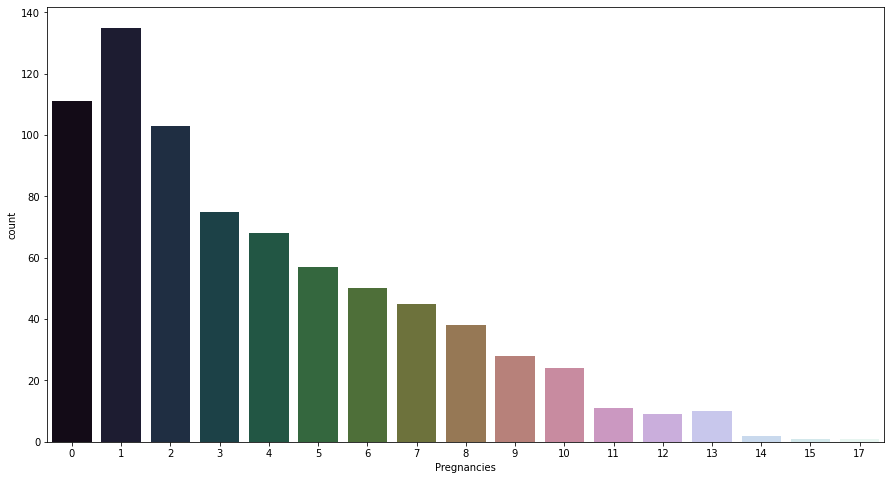

In [39]:
print(data['Pregnancies'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'Pregnancies', data = data, palette = 'cubehelix')

##### Glucose

100    17
99     17
117    16
106    14
129    14
       ..
67      1
65      1
62      1
61      1
199     1
Name: Glucose, Length: 135, dtype: int64


<AxesSubplot:xlabel='Glucose', ylabel='count'>

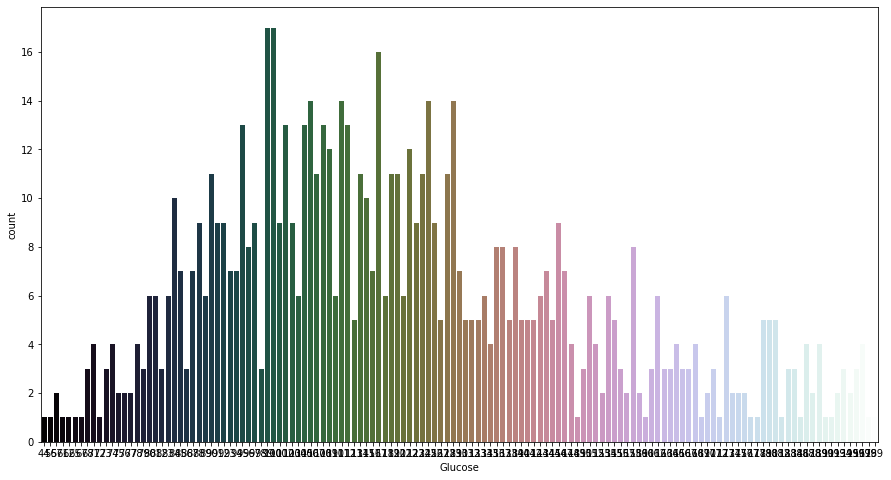

In [40]:
print(data['Glucose'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'Glucose', data = data, palette = 'cubehelix')

##### BloodPressure

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
71     35
62     34
82     30
66     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
94      6
85      6
48      5
96      4
44      4
106     3
98      3
100     3
110     3
30      2
104     2
108     2
55      2
46      2
114     1
24      1
102     1
95      1
61      1
40      1
38      1
122     1
Name: BloodPressure, dtype: int64


<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

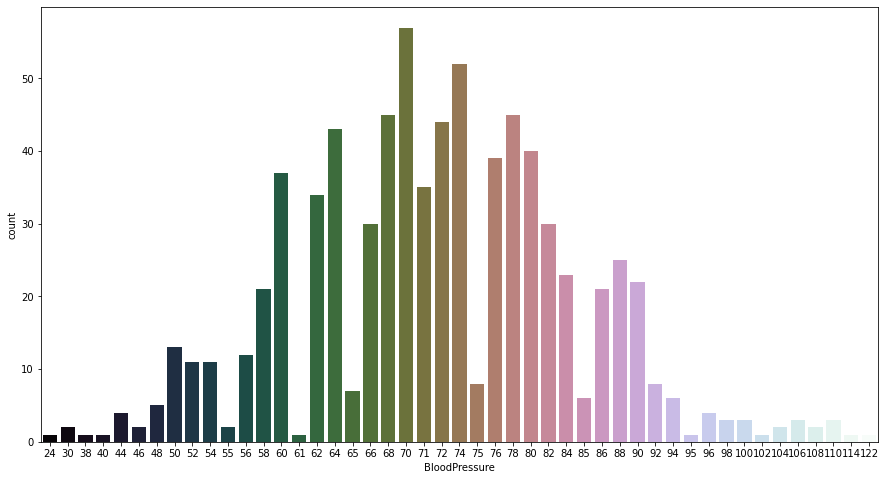

In [41]:
print(data['BloodPressure'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'BloodPressure', data = data, palette = 'cubehelix')

##### SkinThickness

23    249
32     31
30     27
27     23
33     20
18     20
28     20
31     19
39     18
19     18
29     17
22     16
40     16
37     16
25     16
26     16
35     15
41     15
36     14
17     14
15     14
20     13
24     12
13     11
42     11
21     10
46      8
34      8
12      7
38      7
14      6
11      6
45      6
16      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
52      2
54      2
7       2
8       2
51      1
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64


<AxesSubplot:xlabel='SkinThickness', ylabel='count'>

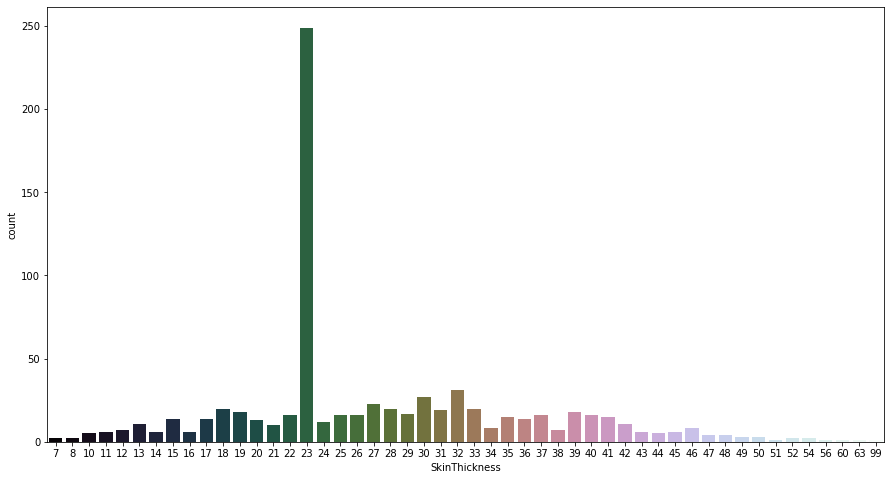

In [42]:
print(data['SkinThickness'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'SkinThickness', data = data, palette = 'cubehelix')

##### Insulin

30.5     374
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
278.0      1
184.0      1
300.0      1
91.0       1
485.0      1
Name: Insulin, Length: 186, dtype: int64


<AxesSubplot:xlabel='Insulin', ylabel='count'>

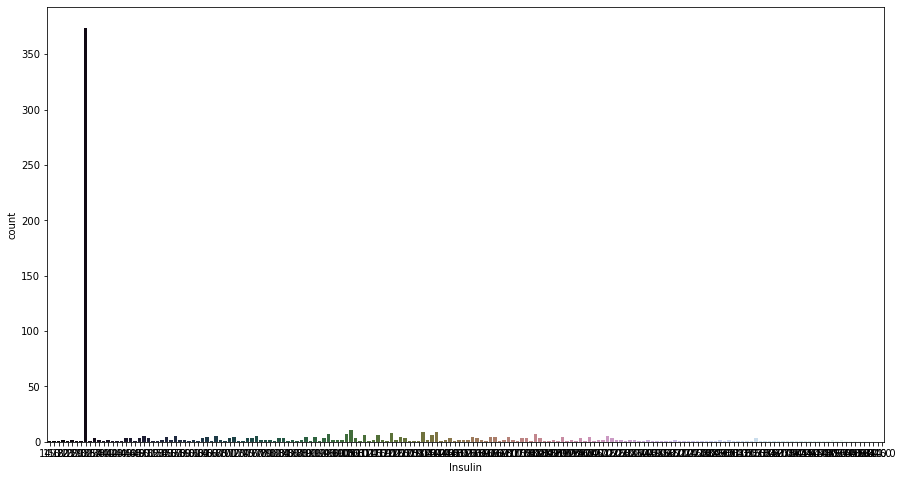

In [43]:
print(data['Insulin'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'Insulin', data = data, palette = 'cubehelix')

##### BMI

32.0    24
31.6    12
31.2    12
32.4    10
33.3    10
        ..
19.3     1
49.3     1
19.4     1
20.0     1
40.1     1
Name: BMI, Length: 247, dtype: int64


<AxesSubplot:xlabel='BMI', ylabel='count'>

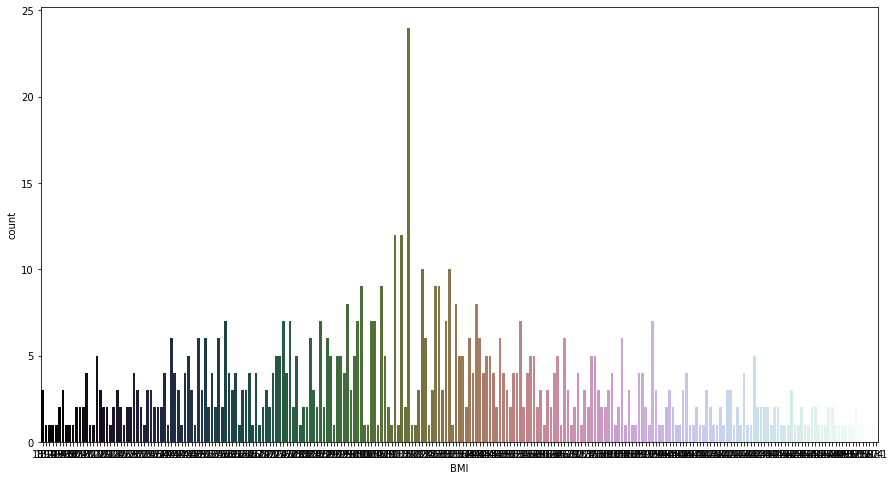

In [44]:
print(data['BMI'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'BMI', data = data, palette = 'cubehelix')

##### DiabetesPedigreeFunction

0.258    6
0.254    6
0.268    5
0.261    5
0.207    5
        ..
0.145    1
0.241    1
1.292    1
0.627    1
0.804    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='count'>

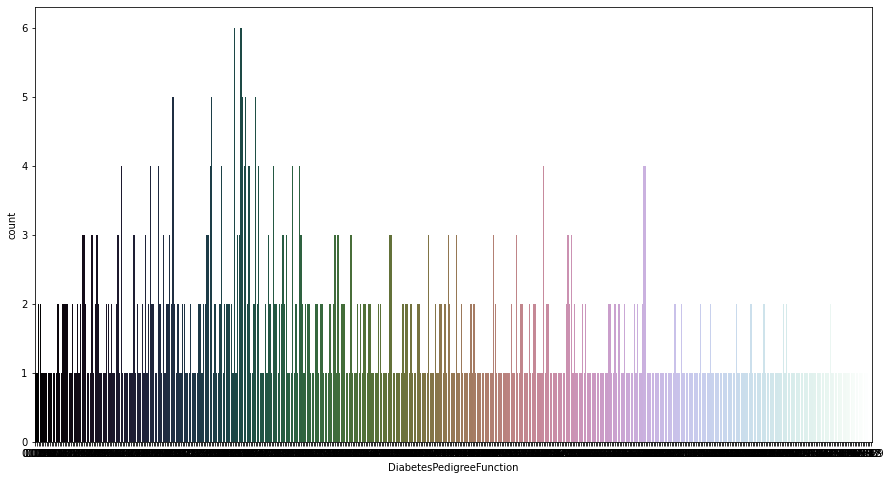

In [45]:
print(data['DiabetesPedigreeFunction'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'DiabetesPedigreeFunction', data = data, palette = 'cubehelix')

##### Age

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: Age, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

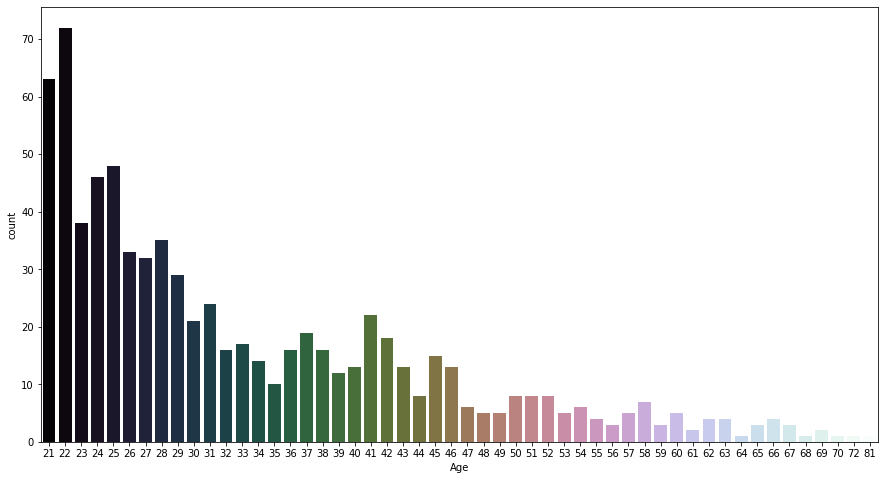

In [46]:
print(data['Age'].value_counts())
plt.figure(figsize = (15,8))
sns.countplot(x = 'Age', data = data, palette = 'cubehelix')

##### Outcome

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

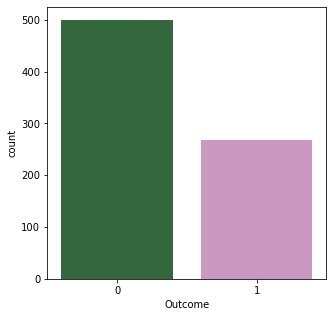

In [47]:
print(data['Outcome'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot(x = 'Outcome', data = data, palette = 'cubehelix')

In [48]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Insights from count plots describing data types and count of variables**
    
Considering this is a dataset with 9 variables but also 768 values,many of them are repeated as we can interpret from every count plot:
  
    - Pregnancies              --> data type: integer. It has 17 values repeated 768 times
    - Glucose                  --> data type: integer. It has 136 values repeated 768 times
    - BloodPressure            --> data type: integer. It has 47 values repeated 768 times 
    - SkinThickness            --> data type: integer. It has 51 values repeated 768 times 
    - Insulin                  --> data type: float. With 186 values 768 times represented
    - BMI                      --> data type: float. With 247 values 768 times represented
    - DiabetesPedigreeFunction --> data type: float. With 517 values 768 times represented
    - Age                      --> data type: integer. With 52 values repeated 768 times
    - Outcome (target)         --> data type: integer. With just 2 values repeated 768 times

From here, the analysis says that the 3 float data type variables contain the highest amount of values, with more than 180 different values, whereas integer data type variables have less than 136 different values

#### 4. Check the balance of the data by plotting the count of outcomes by their value. 
#### Describe your findings and plan future course of action

Count of Outcome classes is:
 0    500
1    268
Name: Outcome, dtype: int64


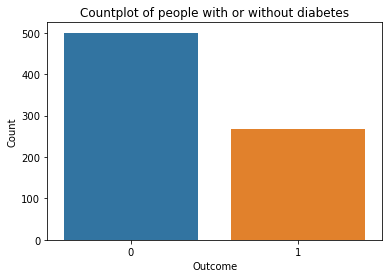

In [49]:
sns.countplot(x = data['Outcome'])
plt.title("Countplot of people with or without diabetes")
plt.xlabel("Outcome")
plt.ylabel("Count")
print("Count of Outcome classes is:\n",data['Outcome'].value_counts())

**Insights from count plot of the target:**

500 (~ 65%) values are counting as '0', this means 500 people do not have diabetes in this study.

Whereas the rest of values, 268 (35%) specificaly are counting as '1', these people have diabetes.

It seems that the ratio between 0 and 1 is 2:1, approximately, the assumption here is this dataset is imbalanced.

#### 5. Create scatter charts between the pair of variables to understand the relationships.
#### Describe your findings

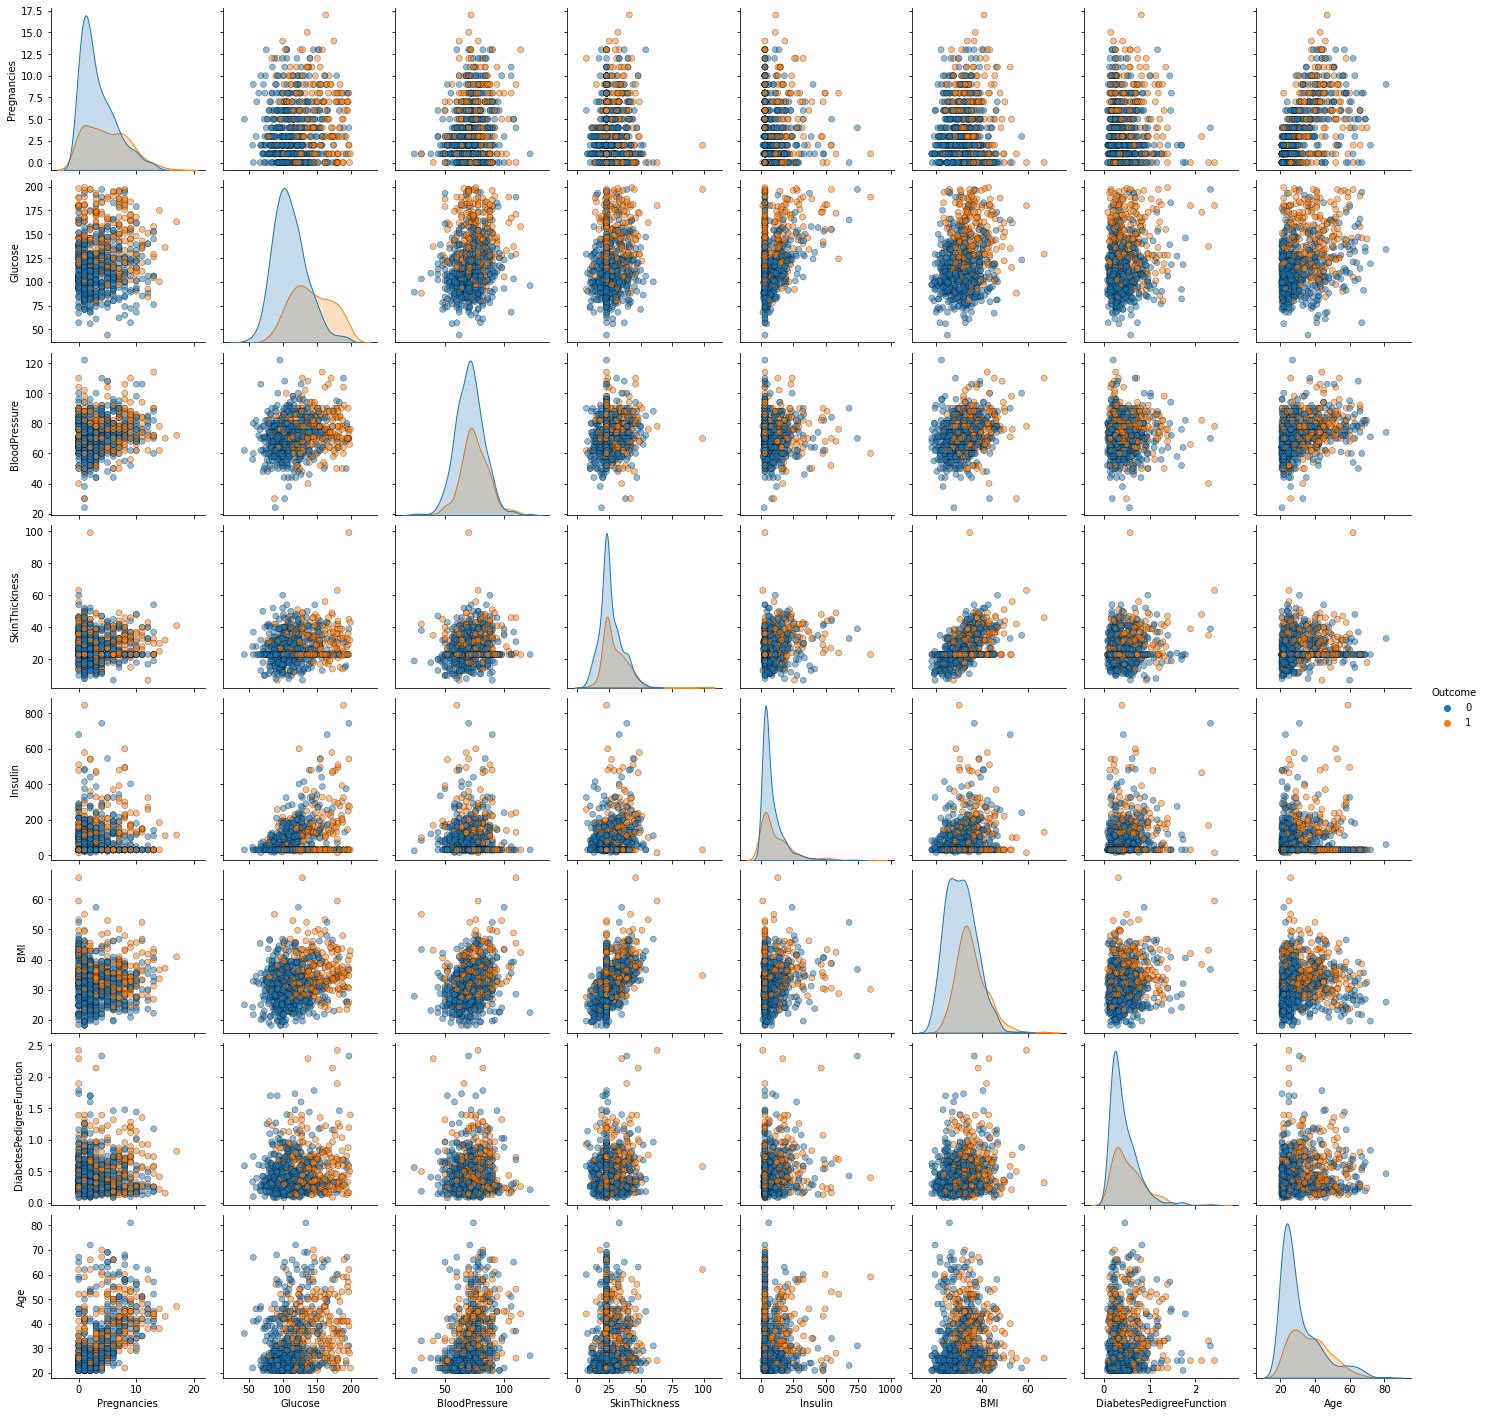

In [50]:
# Let's plot a pairplot to see the bivariate distributions of the variables in one plot. It consists in several scatter plots in
# one plot and also provides the distribution of the diagonally.

# Here we get a general idea about the tendency between two variables in accordance with the target as well

sns.pairplot(data, diag_kind = 'kde', hue= 'Outcome', plot_kws={'alpha':0.5, 'edgecolor': 'k'})

In [ ]:
# Looking different variables by scatter plots:


 BloodPressure vs. Glucose variables show a weak positive correlation

 BMI vs. SkinThickness variables show a strong positive correlation

 Insulin vs. Glucose variables show a weak positive correlation

 BloodPressure vs. BMI variables show a slightly weak positive correlation

 Insulin vs. Pregnancies variables show a weak negative correlation

 Age vs. Pregnancies variables show a weak positive correlation


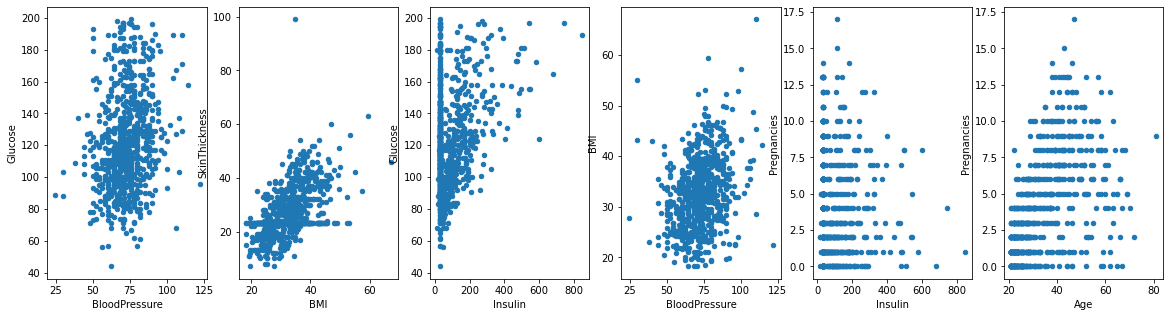

In [51]:
fig,axs = plt.subplots(1,6)

data.plot(kind='scatter', x='BloodPressure', y='Glucose', ax= axs[0], figsize= (20,5))
data.plot(kind='scatter', x='BMI', y='SkinThickness', ax=axs[1])
data.plot(kind='scatter', x='Insulin', y='Glucose', ax=axs[2])
data.plot(kind='scatter', x='BloodPressure', y='BMI', ax=axs[3])
data.plot(kind='scatter', x='Insulin', y='Pregnancies', ax=axs[4])
data.plot(kind='scatter', x='Age', y='Pregnancies', ax=axs[5])

print("\n BloodPressure vs. Glucose variables show a weak positive correlation")
print("\n BMI vs. SkinThickness variables show a strong positive correlation")
print("\n Insulin vs. Glucose variables show a weak positive correlation")
print("\n BloodPressure vs. BMI variables show a slightly weak positive correlation")
print("\n Insulin vs. Pregnancies variables show a weak negative correlation")
print("\n Age vs. Pregnancies variables show a weak positive correlation")

**Insights from pairplot and scatter plots created:**

In general this pairplott shows there is a relationship between most of the variables, some stronger than others, and many of these correlations are positive: both variables increasing in the same direction; whereas the minority of it have a negative correlation: one variable increases, the other descreases.
Considering the "Outcome" as a filter to visualize its behavior into two variables demonstrate that the data set with affirmative diabetes (value of 1) happens with the highest values of variables, in most of the cases.
        
Plotting the scatter charts between some variables as an example that there are many positive correlations and a few negative ones, which means many of them have some relation between. 


#### 6. Perform correlation analysis. Visually explore it using a heat map

##### Colinearity Check

In [52]:
# Apply Correlation Matrix (with target)
data_corr = data.corr()   
data_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208802,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.219356,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208802,0.219356,1.000000,0.149459,-0.026421,0.281246,-0.001428,0.325638,0.164823
SkinThickness,0.032568,0.172143,0.149459,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.026421,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281246,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.001428,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.325638,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.164823,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

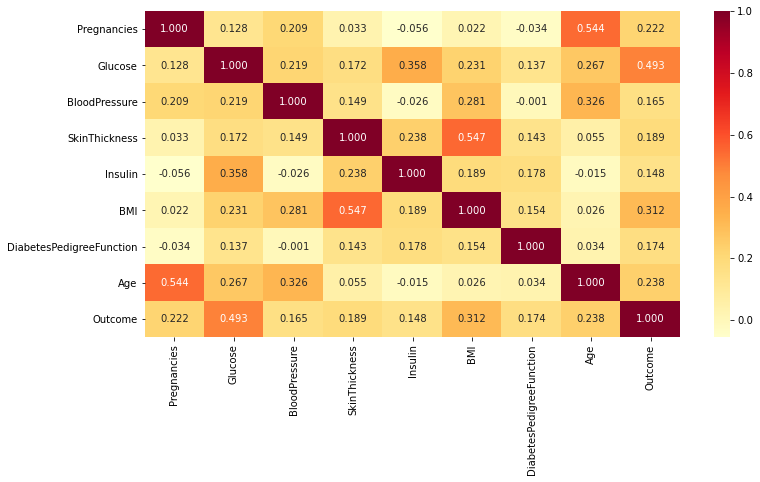

In [53]:
plt.figure(figsize = (12,6))
sns.heatmap(data_corr, cmap = 'YlOrRd', fmt='.3f', annot = True)

**Insights from the heatmap correlation:**
    
Here its ensure there are positive correlation between the next variables:
    
    - Age and Pregnancies,
    - Insulin and Glucose,
    - BMI and SkinThickness, ...

In the opposite side, there are negative correlation between:
    
    - Insulin and Pregnancies,
    - Insulin and BloodPressure,
    - DiabetePedigreeFunction and Pregnancies, ...
    
But a most important characterist here is: The Outcome have a strong correlation with the Glucose values, followed by BMI. This means the output (target) is highly dependent of those 2 variables.

***
## PROJECT TASK: WEEK 2

### DATA MODELING

#### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

#### 2. Apply an appropiate classification algorithm to build a model

#### 4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

#### Please be descriptive to explain what values of these parameter you have used.

The dataset supplied belongs to a supervised type machine learning model, because it has a variable called "Outcome" which represents the output of the dataset. Allows to predict the output for future or unseen data.

This output has a predefined labels that have finite and discrete values like 0 and 1, that is the reason why we could called this output as binary classification (0, 1)

The goal is to predict those discret values that belong to a particular class and evaluate on the basis of accuracy.

There are many types of classification algorithms:
    
    1- Logistic Regression
    2- Naive Bayes
    3- K-Nearest Neighbours (KNN)
    4- Decision Tree
    5- Random Forest
    6- Support Vector Machine
    
The next step is apply them one by one, compare them and conclude what is the best fit or accuracy for this dataset.

### Modeling

#### Separate Features and Target Variables

In [54]:
features = data.drop('Outcome', axis = 1)
print(features.shape)

# The last column is considered as the dependent variable
target = data['Outcome']
print(target.shape)

(768, 8)
(768,)


#### Scale the data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

names = features.columns
scale_df = pd.DataFrame(features_scaled, columns = names)
scale_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.028212,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.524407,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.689806,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.524407,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.674586,0.831114,0.695378,1.549885,5.484909,-0.020496


#### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.2, random_state = 1234)

print("Shape of Train Features:      {}" .format(x_train.shape))
print("Total number of train target:  {}" .format(y_train.shape[0]))
print("Shape of Test Features:       {}" .format(x_test.shape))
print("Total number of test target:   {}" .format(y_test.shape[0]))

Shape of Train Features:      (614, 8)
Total number of train target:  614
Shape of Test Features:       (154, 8)
Total number of test target:   154


### 1- Logistic Regression algorithm

In [57]:
# Initialize and Prediction
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

y_pred_LR = LR_model.predict(x_test)

The Confusion Matrix- LR is shown as:
[[89 10]
 [25 30]]

 The Classification Report- LR shows:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154


 ROC- LR Curve

 Model: ROC AUC- LR= 0.843


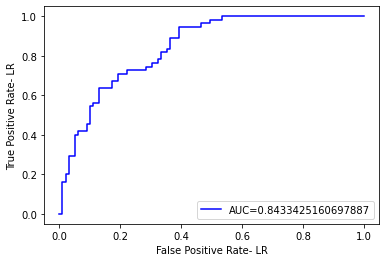

In [58]:
# Accuracy
print("The Confusion Matrix- LR is shown as:") 
print(confusion_matrix(y_test,y_pred_LR))
print("\n","The Classification Report- LR shows:") 
print(classification_report(y_test,y_pred_LR))

print("\n","ROC- LR Curve")
y_pred_proba_LR = LR_model.predict_proba(x_test)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_LR)  # y_pred_proba gives the probabilities of each target class
model_auc_LR = metrics.roc_auc_score(y_test, y_pred_proba_LR)  # Calculate AUC
print("\n",'Model: ROC AUC- LR= %.3f' % (model_auc_LR))  # Summarize score
plt.plot(fpr,tpr,'b',label="AUC="+str(model_auc_LR))  # Create ROC curve
plt.ylabel('True Positive Rate- LR')
plt.xlabel('False Positive Rate- LR')
plt.legend(loc=4)
plt.show()

**Insights for Confusion Matrix- Logistic Regression Model (LR):**

TP --> Actual value and predicted value are true --> 89% of the patients has not been diagnosed with diabetes, and the model also predicted that the patients did not have diabetes.

FN --> Actual value is true, but predicted value is false --> 10% of patients do not have diabetes, but the model predicted that this 10% of patients did have diabetes.

FP --> Predicted value is true, but actual value is false --> the model predicted that 25% of patients did not have diabetes, but in reality, they did have diabetes (Type 1 Error).

TN --> Actual value and predicted value are false --> 30% of the patients are diagnosed with diabetes and the model predicted that those 30% of patients did have diabetes.


**Insights for Classification Report- Logistic Regression Model (LR):**

In this model the accuracy is 77%, and f1- score for patients with majority class (0) is very high: 84% of dataset go close to performance a good prediction; meanwhile, just 63% could predict the minority class in this model. That is the reason of an accuracy of 77%, where patients with diabetes are not too easy to predict.


**Insights for ROC Curve- Logistic Regression Model (LR):**
The AUC for logistic regression model turns out to be 0.843. Since this is close to 1.0, this confirms that the model does a good job of classifying data.

### 2- Naive Bayes algorithm

In [59]:
# Initialize and Prediction
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#NB_model = MultinomialNB()
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

y_pred_NB = NB_model.predict(x_test)

The Confusion Matrix- NB is shown as:
[[87 12]
 [26 29]]

 The Classification Report- NB shows:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154


 ROC- NB Curve

 Model: ROC AUC- NB= 0.803


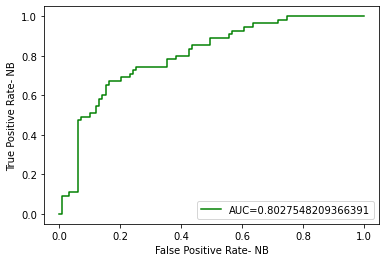

In [60]:
# Accuracy
print("The Confusion Matrix- NB is shown as:") 
print(confusion_matrix(y_test,y_pred_NB))
print("\n","The Classification Report- NB shows:") 
print(classification_report(y_test,y_pred_NB))

print("\n","ROC- NB Curve")
y_pred_proba_NB = NB_model.predict_proba(x_test)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_NB)  # y_pred_proba gives the probabilities of each target class
model_auc_NB = metrics.roc_auc_score(y_test, y_pred_proba_NB)  # Calculate AUC
print("\n",'Model: ROC AUC- NB= %.3f' % (model_auc_NB))  # Summarize score
plt.plot(fpr,tpr,'g',label="AUC="+str(model_auc_NB))  # Create ROC curve
plt.ylabel('True Positive Rate- NB')
plt.xlabel('False Positive Rate- NB')
plt.legend(loc=4)
plt.show()

**Insights for Confusion Matrix- Naive Bayes Model (NB):**

TP --> Actual value and predicted value are true --> 87% of the patients has not been diagnosed with diabetes, and the model also predicted that the patients did not have diabetes.

FN --> Actual value is true, but predicted value is false --> 12% of patients do not have diabetes, but the model predicted that this 12% of patients did have diabetes.

FP --> Predicted value is true, but actual value is false --> the model predicted that 26% of patients did not have diabetes, but in reality, they did have diabetes (Type 1 Error).

TN --> Actual value and predicted value are false --> 29% of the patients are diagnosed with diabetes and the model predicted that those 29% of patients did have diabetes.


**Insights for Classification Report- Naive Bayes Model (NB):**

In this model the accuracy is very low, just 75%, and f1- score for patients with majority class (0) is 82%, which means the performance is not a good prediction; meanwhile, just 60% could predict the minority class (1) in this model. That is the reason of an accuracy of 75%, where patients with diabetes are not too easy to predict.


**Insights for ROC Curve- Logistic Regression Model (NB):**
The AUC for Naive Bayes model turns out to be 0.803. Since this is close to 1.0, this confirms that the model does a good job of classifying data.

### 3- KNN - K-Nearest Neighbours algorithm

#### KNN Model with Standard Scaling data

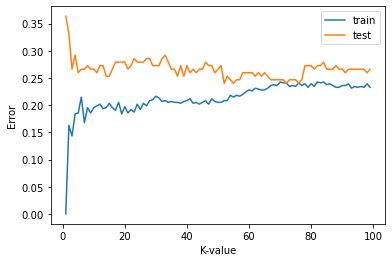

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Calculate error curve to get an optimal K-value

# creating sets for errors
error1= []
error2= []

# for loop 
for k in range(1,100):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1 = knn.predict(x_train)

    # stroring the errors
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(x_test)
    error2.append(np.mean(y_test != y_pred2))

# ploting the error graphs for testing and training 
plt.plot(range(1,100), error1, label="train")
plt.plot(range(1,100), error2, label="test")
plt.xlabel('K-value')
plt.ylabel('Error')
plt.legend()

**Based on the above graph, our trained model will give an optimal solution when the k ~ 30**

In [62]:
# Initialize and Prediction
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=60, weights= 'distance')  # k=26 gave a slightly better result than k=25
KNN_model.fit(x_train, y_train)

y_pred_KNN = KNN_model.predict(x_test)

The Confusion Matrix-KNN is shown as:
[[92  7]
 [32 23]]

 The Classification Report-KNN shows:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        99
           1       0.77      0.42      0.54        55

    accuracy                           0.75       154
   macro avg       0.75      0.67      0.68       154
weighted avg       0.75      0.75      0.72       154


 ROC-KNN Curve

 Model: ROC AUC- KNN= 0.800


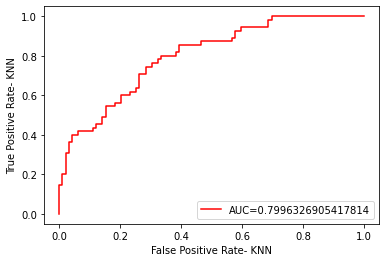

In [63]:
# Accuracy
print("The Confusion Matrix-KNN is shown as:") 
print(confusion_matrix(y_test,y_pred_KNN))
print("\n","The Classification Report-KNN shows:") 
print(classification_report(y_test,y_pred_KNN))

print("\n","ROC-KNN Curve")
y_pred_proba_KNN = KNN_model.predict_proba(x_test)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_KNN)  # y_pred_proba gives the probabilities of each target class
model_auc_KNN = metrics.roc_auc_score(y_test, y_pred_proba_KNN)  # Calculate AUC
print("\n",'Model: ROC AUC- KNN= %.3f' % (model_auc_KNN))  # Summarize score
plt.plot(fpr,tpr,'r',label="AUC="+str(model_auc_KNN))  # Create ROC curve
plt.ylabel('True Positive Rate- KNN')
plt.xlabel('False Positive Rate- KNN')
plt.legend(loc=4)
plt.show()

#### KNN Model with Normalization data

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler_norm = MinMaxScaler(feature_range=(0, 1))

features_norm = scaler_norm.fit_transform(features)

names = features.columns
norm_df = pd.DataFrame(features_norm, columns = names)
norm_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


#### Train Test Split With Normalization data

In [65]:
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(features_norm, target, test_size = 0.2, random_state = 1234)

print("Shape of Train Features :     {}" .format(x_train_norm.shape))
print("Total number of train target:  {}" .format(y_train_norm.shape[0]))
print("Shape of Test Features:       {}" .format(x_test_norm.shape))
print("Total number of test target:   {}" .format(y_test_norm.shape[0]))

Shape of Train Features :     (614, 8)
Total number of train target:  614
Shape of Test Features:       (154, 8)
Total number of test target:   154


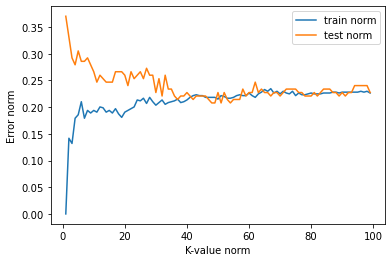

In [66]:
# Calculate error curve to get an optimal K-value

# creating sets for errors
error1_norm= []
error2_norm= []

# for loop 
for k in range(1,100):
    # using KNN algorithm
    knn_norm = KNeighborsClassifier(n_neighbors=k)
    knn_norm.fit(x_train_norm,y_train_norm)
    y_pred1_norm = knn_norm.predict(x_train_norm)

    # stroring the errors
    error1_norm.append(np.mean(y_train_norm != y_pred1_norm))
    y_pred2_norm = knn_norm.predict(x_test_norm)
    error2_norm.append(np.mean(y_test_norm != y_pred2_norm))

# ploting the error graphs for testing and training 
plt.plot(range(1,100), error1_norm, label="train norm")
plt.plot(range(1,100), error2_norm, label="test norm")
plt.xlabel('K-value norm')
plt.ylabel('Error norm')
plt.legend()

In [67]:
# Initialize and Prediction with Normalizing data
from sklearn.neighbors import KNeighborsClassifier

KNN_model_norm = KNeighborsClassifier(n_neighbors=60, weights= 'distance')  # k=26 gave a slightly better result than k=25
KNN_model_norm.fit(x_train, y_train)

y_pred_KNN_norm = KNN_model_norm.predict(x_test)

The Confusion Matrix-KNN normalized is shown as:
[[92  7]
 [32 23]]

 The Classification Report-KNN normalized shows:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        99
           1       0.77      0.42      0.54        55

    accuracy                           0.75       154
   macro avg       0.75      0.67      0.68       154
weighted avg       0.75      0.75      0.72       154


 ROC-KNN normalized Curve

 Model: ROC AUC- KNN normalized= 0.788


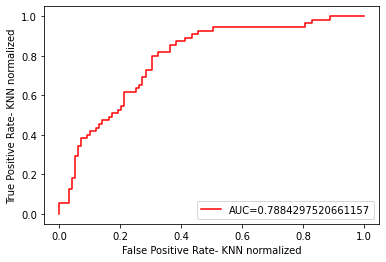

In [68]:
# Accuracy with Normalizing data
print("The Confusion Matrix-KNN normalized is shown as:") 
print(confusion_matrix(y_test_norm,y_pred_KNN_norm))
print("\n","The Classification Report-KNN normalized shows:") 
print(classification_report(y_test_norm,y_pred_KNN_norm))

print("\n","ROC-KNN normalized Curve")
y_pred_proba_KNN_norm = KNN_model_norm.predict_proba(x_test_norm)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test_norm, y_pred_proba_KNN_norm)  # y_pred_proba gives the probabilities of each target class
model_auc_KNN_norm = metrics.roc_auc_score(y_test_norm, y_pred_proba_KNN_norm)  # Calculate AUC
print("\n",'Model: ROC AUC- KNN normalized= %.3f' % (model_auc_KNN_norm))  # Summarize score
plt.plot(fpr,tpr,'r',label="AUC="+str(model_auc_KNN_norm))  # Create ROC curve
plt.ylabel('True Positive Rate- KNN normalized')
plt.xlabel('False Positive Rate- KNN normalized')
plt.legend(loc=4)
plt.show()

**Insights for Confusion Matrix- for both KNN Models (KNN):**

TP/ TP_norm --> Actual value and predicted value are true --> 92% of the patients do not have been diagnosed with diabetes, and the model also predicted that those patients did not have diabetes.
 
FN/ FN_norm --> Actual value is true, but predicted value is false --> 7% of patients do not have diabetes, but the model predicted that this 7% of patients did have diabetes.

FP/ FP_norm --> Predicted value is true, but actual value is false --> the model predicted that 32% of patients did not have diabetes, but in reality, they did have diabetes (Type 1 Error).

TN/ TN_norm --> Actual value and predicted value are false --> 23% of the patients are diagnosed with diabetes and the model predicted that those 23% of patients did have diabetes.


**Insights for Classification Report- for both KNN Models (KNN):**

In these models the accuracy is the same 75%, and f1- score for patients with majority class (0) is high: 83% of dataset go close to performance a good prediction; meanwhile, just 54% could predict the minority class in this model (1). That is the reason of an accuracy of 75%, where patients with diabetes are not too easy to predict.


**Insights for ROC Curve- for both KNN Models (KNN):**
The AUC for both KNN models are very close: 80% and 79%, respectivelt. Both are close to 1.0, so the models do a good job of classifying data.

In this case, normalizing the data looked not really necessary to apply, since there is no any difference in both results.

### 4- Decision Tree

In [69]:
# Initialize and Prediction
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=0)
DT_model.fit(x_train, y_train)

y_pred_DT = DT_model.predict(x_test, check_input=True)

The Confusion Matrix-DT is shown as:
[[76 23]
 [21 34]]

 The Classification Report-DT shows:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154


 ROC-DT Curve

 Model: ROC AUC- DT= 0.693


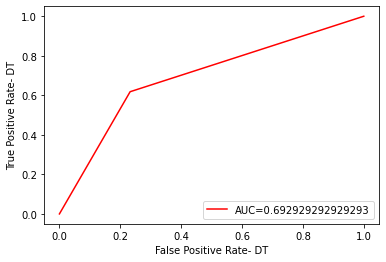

In [70]:
# Accuracy
print("The Confusion Matrix-DT is shown as:") 
print(confusion_matrix(y_test,y_pred_DT))
print("\n","The Classification Report-DT shows:") 
print(classification_report(y_test,y_pred_DT))

print("\n","ROC-DT Curve")
y_pred_proba_DT = DT_model.predict_proba(x_test)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_DT)  # y_pred_proba gives the probabilities of each target class
model_auc_DT = metrics.roc_auc_score(y_test, y_pred_proba_DT)  # Calculate AUC
print("\n",'Model: ROC AUC- DT= %.3f' % (model_auc_DT))  # Summarize score
plt.plot(fpr,tpr,'r',label="AUC="+str(model_auc_DT))  # Create ROC curve
plt.ylabel('True Positive Rate- DT')
plt.xlabel('False Positive Rate- DT')
plt.legend(loc=4)
plt.show()

**Insights for Confusion Matrix- Decision Tree Model (DT):**

TP --> Actual value and predicted value are true --> 76% of the patients has not been diagnosed with diabetes, and the model also predicted that the patients did not have diabetes.

FN --> Actual value is true, but predicted value is false --> 23% of patients do not have diabetes, but the model predicted that this 23% of patients did have diabetes.

FP --> Predicted value is true, but actual value is false --> the model predicted that 21% of patients did not have diabetes, but in reality, they do have diabetes (Type 1 Error).

TN --> Actual value and predicted value are false --> 34% of the patients are diagnosed with diabetes and the model predicted that those 34% of patients did have diabetes.


**Insights for Classification Report- Decision Tree Model (DT):**

In this model the accuracy is 71%, and f1- score for patients with majority class (0) is high: 78% of dataset go close to performance a good prediction; meanwhile, just 61% could predict the minority class in this model. That is the reason of an accuracy of 71%, where patients with diabetes are not too easy to predict.


**Insights for ROC Curve- Decision Tree Model (DT):**
The AUC for Decision Tree model turns out to be 0.693. Since this is close to 0.5, this confirms that the model represent a weak job of classifying data.

### 5- Random Forest

In [71]:
# Initialize and Prediction
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state= 0)
RF_model.fit(x_train, y_train)

y_pred_RF = RF_model.predict(x_test)

The Confusion Matrix-rf is shown as:
[[86 13]
 [24 31]]

 The Classification Report-rf shows:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154


 ROC-RF Curve

 Model: ROC AUC- RF= 0.814


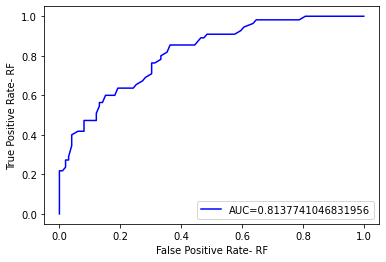

In [72]:
# Accuracy
print("The Confusion Matrix-rf is shown as:") 
print(confusion_matrix(y_test,y_pred_RF))
print("\n","The Classification Report-rf shows:") 
print(classification_report(y_test,y_pred_RF))

print("\n","ROC-RF Curve")
y_pred_proba_RF = RF_model.predict_proba(x_test)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_RF)  # y_pred_proba gives the probabilities of each target class
model_auc_RF = metrics.roc_auc_score(y_test, y_pred_proba_RF)  # Calculate AUC
print("\n",'Model: ROC AUC- RF= %.3f' % (model_auc_RF))  # Summarize score
plt.plot(fpr,tpr,'b',label="AUC="+str(model_auc_RF))  # Create ROC curve
plt.ylabel('True Positive Rate- RF')
plt.xlabel('False Positive Rate- RF')
plt.legend(loc=4)
plt.show()

**Insights for Confusion Matrix- Random Forest Model (RF):**

TP --> Actual value and predicted value are true --> 86% of the patients has not been diagnosed with diabetes, and the model also predicted that the patients did not have diabetes.

FN --> Actual value is true, but predicted value is false --> 13% of patients do not have diabetes, but the model predicted that this 13% of patients did have diabetes.

FP --> Predicted value is true, but actual value is false --> the model predicted that 24% of patients did not have diabetes, but in reality, they did have diabetes (Type 1 Error).

TN --> Actual value and predicted value are false --> 31% of the patients are diagnosed with diabetes and the model predicted that those 31% of patients did have diabetes.


**Insights for Classification Report- Random Forest (RF):**

In this model the accuracy is 76%, and f1- score for patients with majority class (0) is high: 82% of dataset go close to performance a good prediction; meanwhile, just 63% could predict the minority class in this model. That is the reason of an accuracy of 76%, where patients with diabetes are not too easy to predict.
    
This could be a sign of this dataset is not balanced.


**Insights for ROC Curve- Random Forest (RF):**
The AUC for Random Forest model turns out to be 0.814. Since this is pretty close to 1.0, this confirms that the model does a good job of classifying data.

### 6- Support Vector Classifier

In [73]:
# Initialize and Prediction
from sklearn.svm import SVC

SVC_model = SVC(probability= True)
SVC_model.fit(x_train, y_train)

y_pred_SVC = SVC_model.predict(x_test)

The Confusion Matrix-SVC is shown as:
[[87 12]
 [31 24]]

 The Classification Report-SVC shows:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        99
           1       0.67      0.44      0.53        55

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.70       154


 ROC-SVC Curve

 Model: ROC AUC- SVC= 0.830


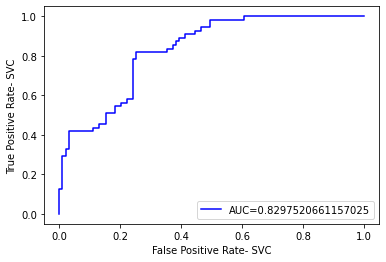

In [74]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Confusion Matrix-SVC is shown as:") 
print(confusion_matrix(y_test,y_pred_SVC))
print("\n","The Classification Report-SVC shows:") 
print(classification_report(y_test,y_pred_SVC))

print("\n","ROC-SVC Curve")
y_pred_proba_SVC = SVC_model.predict_proba(x_test)[::,1]  # Probability predictions
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_SVC)  # y_pred_proba gives the probabilities of each target class
model_auc_SVC = metrics.roc_auc_score(y_test, y_pred_proba_SVC)  # Calculate AUC
print("\n",'Model: ROC AUC- SVC= %.3f' % (model_auc_SVC))  # Summarize score
plt.plot(fpr,tpr,'b',label="AUC="+str(model_auc_SVC))  # Create ROC curve
plt.ylabel('True Positive Rate- SVC')
plt.xlabel('False Positive Rate- SVC')
plt.legend(loc=4)
plt.show()

**Insights for Confusion Matrix- Support Vector Machine Model (SVC):**

TP --> Actual value and predicted value are true --> 87% of the patients has not been diagnosed with diabetes, and the model also predicted that the patients did not have diabetes.

FN --> Actual value is true, but predicted value is false --> 12% of patients do not have diabetes, but the model predicted that this 12% of patients did have diabetes.

FP --> Predicted value is true, but actual value is false --> the model predicted that 31% of patients did not have diabetes, but in reality, they did have diabetes (Type 1 Error).

TN --> Actual value and predicted value are false --> 24% of the patients are diagnosed with diabetes and the model predicted that those 24% of patients did have diabetes.


**Insights for Classification Report- Support Vector Model (SVC):**

In this model the accuracy is 72%, and f1- score for patients with majority class (0) is high: 80% of dataset go close to performance a good prediction; meanwhile, just 53% could predict the minority class in this model. That is the reason of an accuracy of 72%, where patients with diabetes are not too easy to predict.
    
This could be a sign of this dataset is not balanced.


**Insights for ROC Curve- Support Vector Model (SVC):**
The AUC for Support Vector model turns out to be 0.83. Since this is  close to 1.0, this confirms that the model does a good job of classifying data.

#### 3. Compare various models with the results from KNN algorithm

In [75]:
# Create different lists with required information from results:

model_names = ['LR_model', 'NB_model', 'DT_model', 'RF_model', 'SVC_model', 'KNN_model_std', 'KNN_model_norm']

accuracy = [accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_NB), accuracy_score(y_test, y_pred_DT),
           accuracy_score(y_test, y_pred_RF), accuracy_score(y_test, y_pred_SVC), accuracy_score(y_test, y_pred_KNN),
           accuracy_score(y_test_norm, y_pred_KNN_norm)]

AUC = [model_auc_LR, model_auc_NB, model_auc_DT, model_auc_RF, model_auc_SVC, model_auc_KNN,  model_auc_KNN_norm]

In [76]:
# Create a dataframe from lists:
models_compare = pd.DataFrame({'Name': model_names, 'Accuracy': accuracy, 'AUC': AUC})
print(models_compare)

             Name  Accuracy       AUC
0        LR_model  0.772727  0.843343
1        NB_model  0.753247  0.802755
2        DT_model  0.714286  0.692929
3        RF_model  0.759740  0.813774
4       SVC_model  0.720779  0.829752
5   KNN_model_std  0.746753  0.799633
6  KNN_model_norm  0.746753  0.788430


**Insights from comparison between models and KNN algorithm results:**

KNN models did not give good results. More robust algorithms offered better results in this dataset, such as Logistic Regression, Support Vector Machine and Random Forest. Applying KNN algorithm it was more difficult to predict samples with presence of diabetes.  

***

### DATA REPORTING

#### 5. Create a dashboard in Tableau by choosing appropiate chart types and metrics useful for the business. The dashboard must entail the following:

##### - Pie chart to describe the diabetic or non- diabetic population

##### - Scatter charts between relevant variables to analyze the relationships

##### - Histogram or frequency charts to analyze the distribution of the data

##### - Heatmap of correlation analysis among the relevant variables

##### - Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart

***

In [ ]:
**https://public.tableau.com/app/profile/ira7078/viz/SL-Final-Project2-Healthcare_Diabetes-IV/HEALTHCARE-DIABETESDashboard?publish=yes**

***

## End of Project
## Done!!